# Read CogBeacon Data and Convert to h5 for OMA
Original data [here](https://github.com/MikeMpapa/CogBeacon-MultiModal_Dataset_for_Cognitive_Fatigue)

Not a perfect solution, could be more automated. 

In [1]:
import os, sys, pdb
import numpy as np
import pandas as pd
import pathlib

In [18]:
path=pathlib.Path('/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_0_v_m')
path

PosixPath('/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_0_v_m')

In [19]:
def ReadSessionFile(filename):
    """

    :param filename: User EEG file for a single turn
    :return: a dictionary with all the signals recorded during a single round
    """

    data = {}

    with open(filename,"r") as f:
        txt = f.readlines()
    f.close
    #print(len(txt))
    if len(txt) > 0:
        data['h_eeg'] = []
        data['h'] = [[1, 1, 1, 1]]

        for line in txt:
            key = line.split()[0]
            value = line.split()[1:]
            if key not in data.keys():
                data[key] = []
            if key == 'eeg':
                data['h'][-1]
                data['h_eeg'].append(data['h'][-1])
            data[key].append(value)
        data['h'] = np.delete(data['h'],0,0)
    else:
        pass
    if len(data) == 0:
        return None
    else:
        return data


In [23]:
data=ReadSessionFile(path/'0_5')

In [24]:
data['eeg']

[['820.845214844', '812.620300293', '830.715087891', '834.005004883'],
 ['819.200195312', '802.750427246', '827.425109863', '837.29498291'],
 ['822.49017334', '810.975280762', '825.780151367', '825.780151367'],
 ['822.49017334', '814.265258789', '824.135131836', '827.425109863'],
 ['819.200195312', '809.330322266', '827.425109863', '825.780151367'],
 ['819.200195312', '810.975280762', '832.360046387', '830.715087891'],
 ['815.91027832', '806.040344238', '822.49017334', '830.715087891'],
 ['820.845214844', '814.265258789', '815.91027832', '829.070068359'],
 ['814.265258789', '814.265258789', '824.135131836', '824.135131836'],
 ['815.91027832', '812.620300293', '830.715087891', '830.715087891'],
 ['825.780151367', '809.330322266', '832.360046387', '838.940002441'],
 ['824.135131836', '807.68536377', '825.780151367', '824.135131836'],
 ['825.780151367', '812.620300293', '832.360046387', '835.650024414'],
 ['825.780151367', '819.200195312', '832.360046387', '835.650024414'],
 ['824.1351318

In [25]:
len(data['eeg'])/220

2.3454545454545452

In [38]:
df=pd.DataFrame(data['eeg'])

In [74]:
df=df.astype(float)

In [75]:
df

,0,1,2,3
0,832.360046,924.478943,802.750427,827.425110
1,840.584961,861.969727,812.620300,840.584961
2,840.584961,778.075684,812.620300,835.650024
3,835.650024,755.045959,794.525513,814.265259
4,847.164856,712.276489,822.490173,842.229919
...,...,...,...,...
978,880.064453,681.021851,837.294983,863.614685
979,870.194580,674.441956,817.555237,840.584961
980,873.484558,666.217041,824.135132,861.969727
981,858.679749,672.796936,825.780151,853.744812


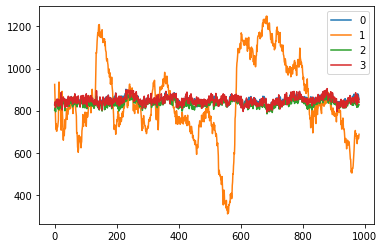

In [76]:
df.plot.line()

In [77]:
df.rename({0: 'TP9', 1: 'AF7', 2:'AF9', 3:'TP10'}, axis='columns')

,TP9,AF7,AF9,TP10
0,832.360046,924.478943,802.750427,827.425110
1,840.584961,861.969727,812.620300,840.584961
2,840.584961,778.075684,812.620300,835.650024
3,835.650024,755.045959,794.525513,814.265259
4,847.164856,712.276489,822.490173,842.229919
...,...,...,...,...
978,880.064453,681.021851,837.294983,863.614685
979,870.194580,674.441956,817.555237,840.584961
980,873.484558,666.217041,824.135132,861.969727
981,858.679749,672.796936,825.780151,853.744812


In [78]:
df.to_hdf('s01_test.h5',key='df')

In [87]:
path=pathlib.Path('/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_0_v_o')
path

PosixPath('/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_0_v_o')

In [3]:
import time, glob

# outfilename = 'all_' + str((int(time.time()))) + ".txt"

filenames = glob.glob('/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/*')

In [4]:
filenames

['/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/5_34',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/6_40',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/3_21',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/1_12',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/7_46',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/8_53',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/0_7',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/2_19',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/7_47',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/4_30',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/9_57',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/7_45',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/5_35',
 '/media/tris/tris_files/DEAP_dataset/CogBeacon/eeg/user_19_v_o/8_54',
 '/medi

In [167]:
n=1
for fname in filenames:
    data=ReadSessionFile(fname)
    df=pd.DataFrame(data['eeg'])
    df=df.astype(float)
    if n < 10:
        df.to_hdf('S19T'+str(n)+'cogbe.h5',key='df')
    else:
        df.to_hdf('S19T'+str(n)+'cogbe.h5',key='df')
    n=n+1
    print(n)
    

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
